In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import os
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
## Comments post Disdussion on Sept 3rd

- Change the histogram plots to CDF plots 

In [4]:
p_b = Path('/eagle/projects/argonne_tpc/siebenschuh/aurora_gpt/database/')
os.listdir(p_b)

['mini_0.csv',
 'parser_text_output_and_scores_PROFILING.csv',
 'meta_raw_table.csv',
 'out_table_ALL_error.csv',
 '.ipynb_checkpoints',
 'parser_output_proc_0-4.csv',
 'predicted_categories',
 'safecopy',
 'mini_with_scores_0.csv',
 'parser_output_reduced_proc_10-233.csv',
 'parser_output_with_metrics.csv',
 'meta_proc_table.csv',
 'parser_output_proc_1-4.csv',
 'parser_text_output_and_scores_error.csv',
 'parser_meta_and_metrics.csv',
 'parser_text_output_raw_LEGACY.csv',
 'parser_output_proc_2-4.csv',
 'parser_output_proc_3-4.csv',
 'parser_output_raw.csv',
 'parser_output_proc_4-4.csv',
 'out_table_reduced_ALL_error.csv',
 'parser_text_output_and_scores.csv',
 'outraw_0.csv']

In [5]:
# path to BLEU etc.
p = Path('/eagle/projects/argonne_tpc/siebenschuh/aurora_gpt/database/parser_meta_and_metrics.csv')

# exclude text-columns
headers = [*pd.read_csv(p, sep='|', nrows=1)]
df = pd.read_csv(p, sep='|', usecols=[c for c in headers if c not in {'html', 'nougat', 'pymupdf', 'grobid', 'pypdf', 'marker'}])

/var/tmp/pbs.4360.sophia-pbs-01.lab.alcf.anl.gov/ipykernel_1235108/966621326.py:6: DtypeWarning: Columns (2,4,5,6,7,8,9,10,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(p, sep='|', usecols=[c for c in headers if c not in {'html', 'nougat', 'pymupdf', 'grobid', 'pypdf', 'marker'}])


## Descriptive statistics of the dataset

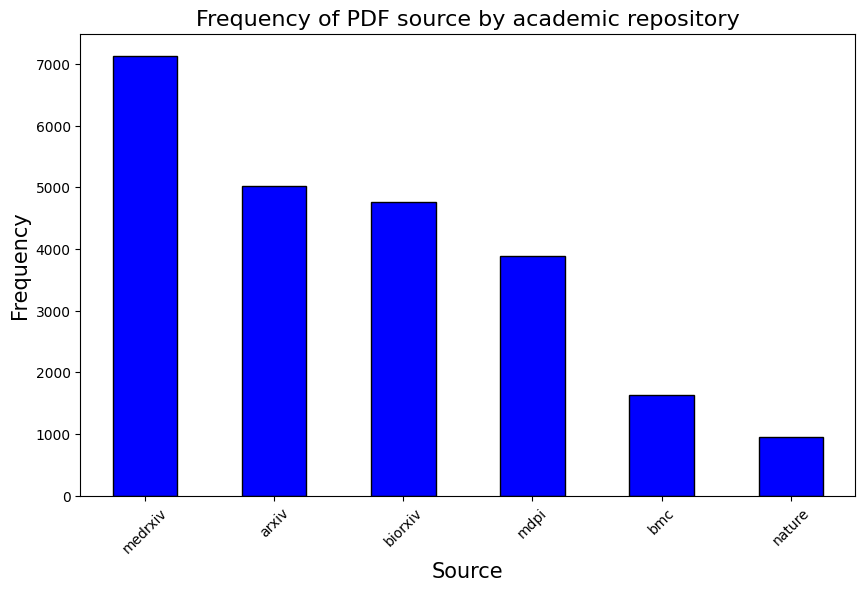

In [6]:
first_elements = df['path'].str.split('/').str[0]

# Step 3: Count the occurrences of each unique value
value_counts = first_elements.value_counts()

# Step 4: Plot the results as a bar chart
value_counts.plot(kind='bar', figsize=(10, 6), color='blue', edgecolor='black')

# Add labels and title
plt.title('Frequency of PDF source by academic repository', fontsize=16)
plt.xlabel('Source', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45)

# Show the plot
plt.show()

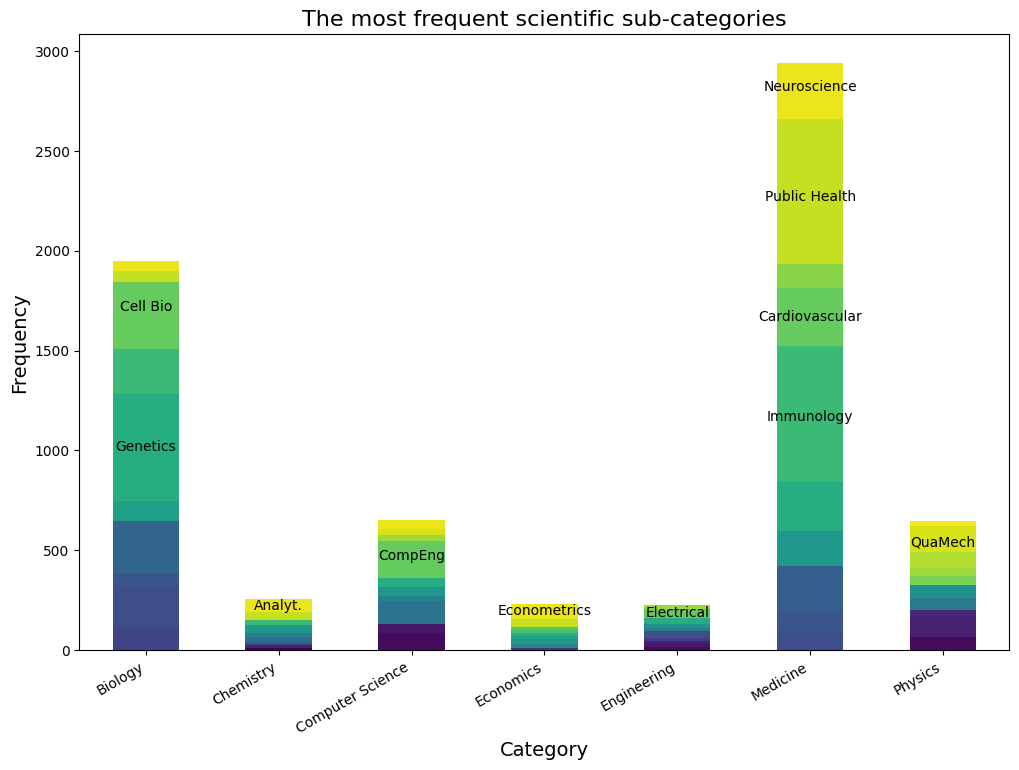

In [7]:
# Assuming df is your DataFrame
df_filtered = df[~df['category'].isna()][['category', 'subcategory']]
df_filtered = df_filtered[((df_filtered['category']!='Mathematics') & (df_filtered['subcategory']!='Probability')) & ((df_filtered['category']!='Mathematics') & (df_filtered['subcategory']!='Topology'))]

# Group by 'category' and 'subcategory', and count occurrences
grouped = df_filtered.groupby(['category', 'subcategory']).size().reset_index(name='counts')

# Sort the groups by category and then by counts within each category
grouped_sorted = grouped.sort_values(['category', 'counts'], ascending=[True, False])

# Select the top 10 subcategories for each category
top_subcategories = grouped_sorted.groupby('category').head(10)

# Pivot the data to have subcategories as columns and categories as rows
pivot_df = top_subcategories.pivot(index='category', columns='subcategory', values='counts')

# Plot the frequency table
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

# Add labels and title
plt.title('The most frequent scientific sub-categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=30, ha='right')

# Remove the legend as per the requirement
plt.legend().remove()

# Manually add text labels for a few subcategories
# Adjust the coordinates based on where you want the text to appear
# Example subcategory names with (x, y) coordinates
# Bio
ax.text(0, 1000, 'Genetics', fontsize=10, color='black', ha='center')
ax.text(0, 1700, 'Cell Bio', fontsize=10, color='black', ha='center')
ax.text(1, 200, 'Analyt.', fontsize=10, color='black', ha='center')
ax.text(2, 450, 'CompEng', fontsize=10, color='black', ha='center')
ax.text(3, 175, 'Econometrics', fontsize=10, color='black', ha='center')
ax.text(4, 165, 'Electrical', fontsize=10, color='black', ha='center')
ax.text(5, 2250, 'Public Health', fontsize=10, color='black', ha='center')
ax.text(5, 1150, 'Immunology', fontsize=10, color='black', ha='center')
ax.text(5, 1650, 'Cardiovascular', fontsize=10, color='black', ha='center')
ax.text(5, 2800, 'Neuroscience', fontsize=10, color='black', ha='center')
ax.text(6, 520, 'QuaMech', fontsize=10, color='black', ha='center')

# Show the plot
plt.show()

In [8]:
# set `True` to find locations for text boxes that require INDIVIDUAL FINETUNING
# Note: subcategory inference is fairly terrible, e.g. many non-math PDFs got "Probablity
domain = 'Biology'
if True:
    # Calculate unique subcategories and their counts
    subcategories, counts = np.unique(df_filtered[df_filtered['category'] == domain]['subcategory'], return_counts=True)
    
    # Sort by frequency (counts) in descending order
    sorted_indices = np.argsort(counts)[::-1]
    sorted_subcategories = subcategories[sorted_indices]
    sorted_counts = counts[sorted_indices]

    for i,(subcategory, count) in enumerate(zip(sorted_subcategories, sorted_counts)):
        print(f'{subcategory}: {count}')
        if i > 7:
            break

Genetics: 537
Neuroscience: 335
Cell Biology: 260
Immunology: 222
Biotechnology: 209
Bioinformatics: 114
Evolutionary Biology: 99
Cancer Biology: 65
Public Health: 56


## Question 1a: How does parser output quality vary (if any)

In [9]:
df['rouge_pymupdf']

0        0.825875
1        0.823477
2        0.392906
3        0.597425
4        0.472825
           ...   
23393    0.000298
23394    0.000000
23395    0.011316
23396    0.000000
23397    0.008208
Name: rouge_pymupdf, Length: 23398, dtype: float64

In [10]:
df.columns

Index(['Unnamed: 0', 'path', 'prim_cat', 'title', 'pdf_url', 'html_url',
       'summary', 'comment', 'id', 'date_published', 'date_updated', 'doi',
       'categories', 'journal_ref', 'pdf_path', 'category', 'subcategory',
       'html_norm', 'nougat_norm', 'pymupdf_norm', 'grobid_norm', 'pypdf_norm',
       'marker_norm', 'bleu_nougat', 'rouge_nougat', 'car_nougat',
       'bleu_nougat_norm', 'rouge_nougat_norm', 'car_nougat_norm',
       'bleu_pymupdf', 'rouge_pymupdf', 'car_pymupdf', 'bleu_pymupdf_norm',
       'rouge_pymupdf_norm', 'car_pymupdf_norm', 'bleu_grobid', 'rouge_grobid',
       'car_grobid', 'bleu_grobid_norm', 'rouge_grobid_norm',
       'car_grobid_norm', 'bleu_pypdf', 'rouge_pypdf', 'car_pypdf',
       'bleu_pypdf_norm', 'rouge_pypdf_norm', 'car_pypdf_norm', 'bleu_marker',
       'rouge_marker', 'car_marker', 'bleu_marker_norm', 'rouge_marker_norm',
       'car_marker_norm'],
      dtype='object')

In [11]:
def plot_metric_histogram(df, metric:str='bleu', normalize:bool=False, height=6, width=8, num_parsers=5, cond_mean_threshold:float=0.05):
    """
    Plots histograms for BLEU scores of different parsers and adds vertical lines for conditional means.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the BLEU scores.
    height (int): The height of the plot.
    width (int): The width of the plot.
    num_parsers (int): The number of parsers (columns) to plot.
    """

    assert metric in {'bleu', 'rouge', 'car'}, "Metric must be `bleu`, `rouge`, `car`. `meteor` is not provided"
    norm_suff = '_norm' if normalize else ''
    
    # Step 1: Filter the DataFrame to exclude values smaller than 0.05 for mean calculation
    praser_scores = [f'{metric}_nougat' + norm_suff, f'{metric}_pymupdf' + norm_suff, f'{metric}_grobid' + norm_suff, 
                     f'{metric}_marker' + norm_suff, f'{metric}_pypdf' + norm_suff]
    praser_scores = praser_scores[:num_parsers]  # Limit the number of parsers based on num_parsers
    filtered_df = df[praser_scores].apply(lambda x: x[x >= cond_mean_threshold])

    # Step 2: Calculate the conditional mean for each column
    means = filtered_df.mean()

    # Step 3: Set consistent colors for both histograms and vertical lines
    colors = ['blue', 'orange', 'green', 'red', 'pink'][:num_parsers]  # Limit to the number of parsers

    # Step 4: Plot histograms for the entire dataset (not just the filtered one)
    ax = df[praser_scores].plot.hist(alpha=0.5, bins=30, edgecolor='black', color=colors, figsize=(width, height))

    for i, (mean, color) in enumerate(zip(means, colors)):
        plt.axvline(mean, color=color, linestyle='dashed', linewidth=2)
        # Visually disentangle similar values
        if mean > 0.5:
            if i % 2 == 1:
                x_offset = 0.09  # Shift left
                y_offset = -0.1
            else:
                x_offset = -0.09   # Shift right
                y_offset = 0.1
        else:
            x_offset = 0.0
            y_offset = 0.0
        
        plt.text(mean, 
                 plt.gca().get_ylim()[0] - plt.gca().get_ylim()[1] * 0.08, 
                 f'{mean:.2f}', color=color, ha='center', fontsize=13)

    # Add labels and title
    plt.title((f"{'Normalized ' if normalize else ''}{metric.upper()} accuracy of raw text output"), fontsize=17)
    plt.xlabel(f'{metric.upper()} Score', labelpad=18, fontsize=13)
    plt.ylabel('Frequency', labelpad=12, fontsize=13)
    plt.ylim(0,3000)
    plt.xlim(0.0, 1.0)

    # Create a custom legend with parser names capitalized
    parser_names = ['Nougat', 'PyMuPDF', 'Grobid', 'Marker', 'pypdf'][:num_parsers]
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    plt.legend(handles, parser_names, fontsize=12, title_fontsize='13')

    # Show the plot
    plt.show()

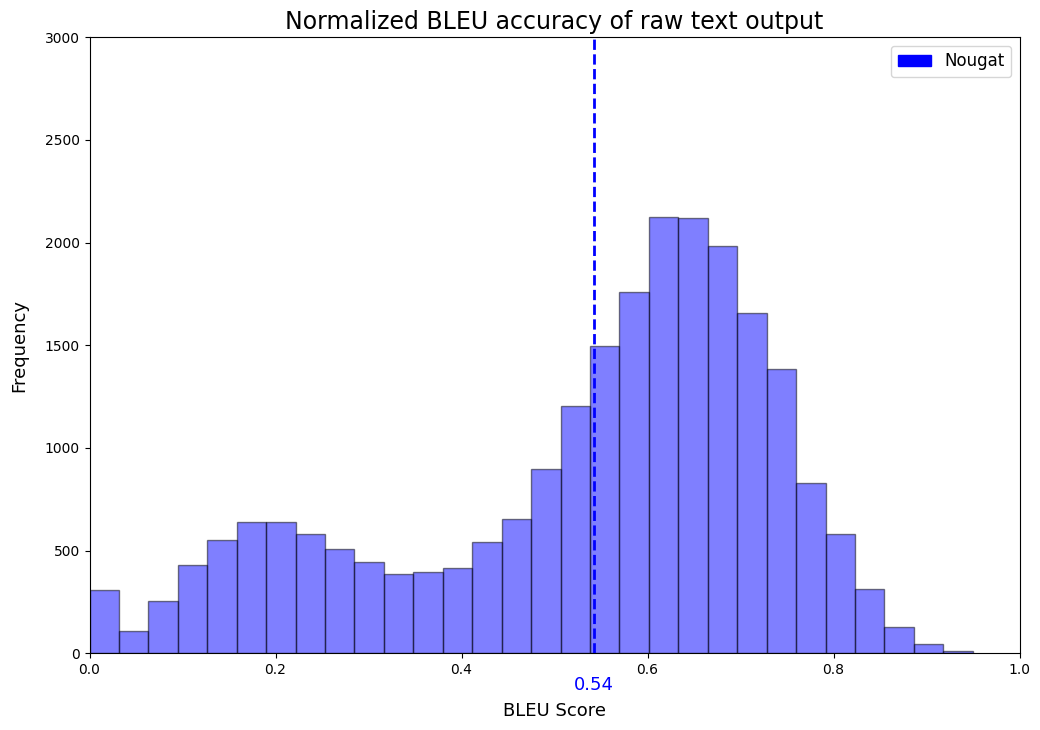

In [12]:
plot_metric_histogram(df, metric='bleu', normalize=True, height=8, width=12, num_parsers=1, cond_mean_threshold=0.05)

In [13]:
def transform_df_for_analytics(df, cond_mean_threshold:float=0.15):
    """
    Transforms the input DataFrame into a format with parsers as row indices and metrics as columns,
    filtering out elements smaller than or equal to the specified threshold before computing means.
    
    Parameters:
    df (pd.DataFrame): The original DataFrame with columns for different parsers and metrics.
    cond_mean_threshold (float): The threshold below which values are excluded from the mean calculation.
    
    Returns:
    pd.DataFrame: A transformed DataFrame with parsers as row indices and metrics as columns.
    """

    columns = ['path', 'category', 'subcategory', 'html_norm', 'nougat_norm', 'pymupdf_norm', 'grobid_norm', 'pypdf_norm',
       'marker_norm', 'bleu_nougat', 'rouge_nougat', 'car_nougat',
       'bleu_nougat_norm', 'rouge_nougat_norm', 'car_nougat_norm',
       'bleu_pymupdf', 'rouge_pymupdf', 'car_pymupdf', 'bleu_pymupdf_norm',
       'rouge_pymupdf_norm', 'car_pymupdf_norm', 'bleu_grobid', 'rouge_grobid',
       'car_grobid', 'bleu_grobid_norm', 'rouge_grobid_norm',
       'car_grobid_norm', 'bleu_pypdf', 'rouge_pypdf', 'car_pypdf',
       'bleu_pypdf_norm', 'rouge_pypdf_norm', 'car_pypdf_norm', 'bleu_marker',
       'rouge_marker', 'car_marker', 'bleu_marker_norm', 'rouge_marker_norm',
       'car_marker_norm']

    # Subset columns
    df = df[columns]
    
    # Define the list of parsers and metrics of interest
    parsers = ['nougat', 'marker', 'pymupdf', 'grobid', 'pypdf']
    metrics = ['bleu', 'rouge', 'car', 'bleu_norm', 'rouge_norm', 'car_norm']
    
    # Initialize an empty DataFrame for the analytics
    df_analytics = pd.DataFrame(index=parsers, columns=metrics)
    
    # Iterate over each parser and metric to fill in the DataFrame
    for parser in parsers:
        for metric in metrics:
            # Construct the column name based on the parser and metric
            col_name = f'{metric.split("_")[0]}_{parser}'
            if 'norm' in metric:
                col_name += '_norm'
            
            # Filter values that are greater than the threshold and compute the mean
            if col_name in df.columns:
                filtered_values = df[col_name][df[col_name] > cond_mean_threshold]
                if not filtered_values.empty:
                    df_analytics.loc[parser, metric] = filtered_values.mean()

    # Rename columns for LaTeX
    df_analytics.columns = [col.upper() if '_norm' not in col else col.split('_')[0].upper() + ' (norm.)' for col in df_analytics.columns]
    
    return df_analytics

def highlight_max(data):
    """
    Highlight the maximum value in each column in bold for LaTeX conversion.
    
    Parameters:
    data (pd.DataFrame): The DataFrame to highlight.
    
    Returns:
    pd.DataFrame: The DataFrame with LaTeX code for bold maximum values.
    """
    # Use apply to find the maximum in each column and replace it with LaTeX bold syntax
    return data.apply(lambda x: [f"\\textbf{{{v}}}" if v == x.max() else v for v in x], axis=0)

def df_to_latex_with_bold_max(df, decimals:int=2):
    """
    Converts a Pandas DataFrame to a LaTeX table format with the largest number in each column bolded.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to convert.
    decimals (int): The number of decimal places to round the values to.
    
    Returns:
    str: A string containing the LaTeX table code.
    """
    # Multiply all entries by 100 and round to the specified number of decimals
    df = df * 100.0
    
    # Apply custom formatting to round and remove trailing zeros
    df_rounded = df.apply(lambda x: x.map(lambda v: f"{v:.{decimals}f}".rstrip('0').rstrip('.')))

    # Apply the highlight_max function to bold the maximum values in each column
    df_bold = highlight_max(df_rounded)
    
    # Convert the DataFrame to LaTeX format
    return df_bold.to_latex(escape=False, index=True, bold_rows=True, caption="Table Caption", label="tab:table_label")


In [14]:
print(df_to_latex_with_bold_max(transform_df_for_analytics(df)))

\begin{table}
\caption{Table Caption}
\label{tab:table_label}
\begin{tabular}{lllllll}
\toprule
 & BLEU & ROUGE & CAR & BLEU (norm.) & ROUGE (norm.) & CAR (norm.) \\
\midrule
\textbf{nougat} & 46.73 & 64.01 & \textbf{62.67} & 56.44 & 65.75 & 66.41 \\
\textbf{marker} & \textbf{50.25} & \textbf{66.59} & 61.38 & \textbf{56.75} & \textbf{67.62} & \textbf{67.22} \\
\textbf{pymupdf} & 49.08 & 60.33 & 59.64 & 50.56 & 61.06 & 61.62 \\
\textbf{grobid} & 34.04 & 54.71 & 56.55 & 34.53 & 53.54 & 57.53 \\
\textbf{pypdf} & 46.24 & 59.56 & 43.43 & 47.58 & 60.41 & 60.72 \\
\bottomrule
\end{tabular}
\end{table}



In [25]:
df_sub = df[df['path'].str.startswith('arxiv')]

df_round = transform_df_for_analytics(df_sub)
df_round * 100

,BLEU,ROUGE,CAR,BLEU (norm.),ROUGE (norm.),CAR (norm.)
nougat,45.516474,71.993718,67.930274,60.198908,71.839731,74.929971
marker,52.178665,74.697115,70.147479,61.799458,74.431765,76.774605
pymupdf,55.239786,65.149699,64.645699,57.108608,64.29713,66.987685
grobid,31.422792,56.232659,57.68077,32.073568,54.74154,59.335298
pypdf,47.736164,53.705903,51.100924,48.897132,54.514277,58.845937


,BLEU,ROUGE,CAR,BLEU (norm.),ROUGE (norm.),CAR (norm.)
nougat,46.730728,64.008135,62.665509,56.4377,65.750746,66.414228
marker,50.249412,66.593677,61.37717,56.753595,67.624382,67.223462
pymupdf,49.078033,60.331405,59.641191,50.557431,61.061187,61.622687
grobid,34.040919,54.714079,56.547398,34.52988,53.538906,57.52975
pypdf,46.238675,59.557386,43.425855,47.580321,60.40704,60.717303


In [16]:
def plot_smoothed_bleu_scores(df, q=0.1, smooth_val:int=50, num_parsers:int=4, normalized_flag:bool=False):
    # Set columns based on normalization flag
    if normalized_flag:
        bleu_columns = {
            'nougat': 'bleu_nougat_norm',
            'pymupdf': 'bleu_pymupdf_norm',
            'grobid': 'bleu_grobid_norm',
            #'marker': 'bleu_marker_norm',
            'pypdf': 'bleu_pypdf_norm'
        }
    else:
        bleu_columns = {
            'nougat': 'bleu_nougat',
            'pymupdf': 'bleu_pymupdf',
            'grobid': 'bleu_grobid',
            #'marker': 'bleu_marker',
            'pypdf': 'bleu_pypdf'
        }

    # Select the relevant parser columns
    parsers = list(bleu_columns.values())[:num_parsers]
    colors = ['blue', 'orange', 'green', 'pink'][:num_parsers]  # Limit to the number of parsers

    # Fill NaNs to avoid issues in plotting (could also use dropna if appropriate)
    df[parsers] = df[parsers].fillna(0)

    # Compute means
    df['bleu_norm_mean'] = df[parsers].mean(axis=1)

    # Step 1: Sort the DataFrame by 'bleu_norm_mean' in descending order
    df_sorted = df.sort_values(by='bleu_norm_mean', ascending=False).reset_index(drop=True)

    # DEBUG
    print('len(df_sorted[parsers]) : ', len(df_sorted[parsers]))
    
    # Step 2: Apply a rolling mean to smooth the time series
    df_smoothed = df_sorted[parsers].rolling(window=500, min_periods=1).mean()

    # Calculate the rolling quantiles for confidence intervals
    df_lower = df_sorted[parsers].rolling(window=500, min_periods=1).quantile(q)
    df_upper = df_sorted[parsers].rolling(window=500, min_periods=1).quantile(1 - q)

    # Step 3: Plot the smoothed time series with confidence bands
    plt.figure(figsize=(10, 6))

    # Plotting with colors
    for parser_column, col in zip(parsers, colors):
        plt.plot(df_smoothed.index, df_smoothed[parser_column], label=parser_column, color=col)
        plt.fill_between(df_smoothed.index, df_lower[parser_column], df_upper[parser_column], color=col, alpha=0.3)

    # Adding labels and title
    plt.xlabel('Hardness to parse the PDF', labelpad=18)
    plt.ylabel('BLEU Score')

    # Conditionally set the title
    if normalized_flag:
        plt.title('Smoothed BLEU Scores by Method with Confidence Bands')
    else:
        plt.title('Smoothed BLEU Scores of Normalized Text by Method with Confidence Bands')

    plt.legend()

    # Modify the x-axis: remove tick labels but keep the tick lines
    plt.gca().set_xticklabels([])

    # Add the "Easy" and "Hard" text labels
    plt.text(0.15 * len(df_smoothed), plt.gca().get_ylim()[1] * -0.1, 'Easy', ha='center', fontsize=10)
    plt.text(0.50 * len(df_smoothed), plt.gca().get_ylim()[1] * -0.1, 'Medium', ha='center', fontsize=10)
    plt.text(0.85 * len(df_smoothed), plt.gca().get_ylim()[1] * -0.1, 'Hard', ha='center', fontsize=10)

    # Show the plot
    plt.show()

len(df_sorted[parsers]) :  23398


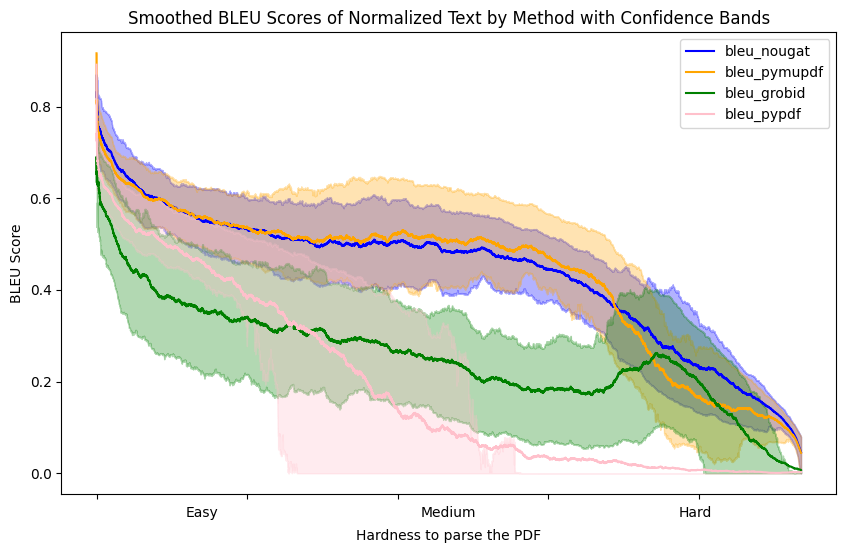

In [17]:
# Example usage with a quantile parameter q=0.35
plot_smoothed_bleu_scores(df, 0.2, False)

len(df_sorted[parsers]) :  23398


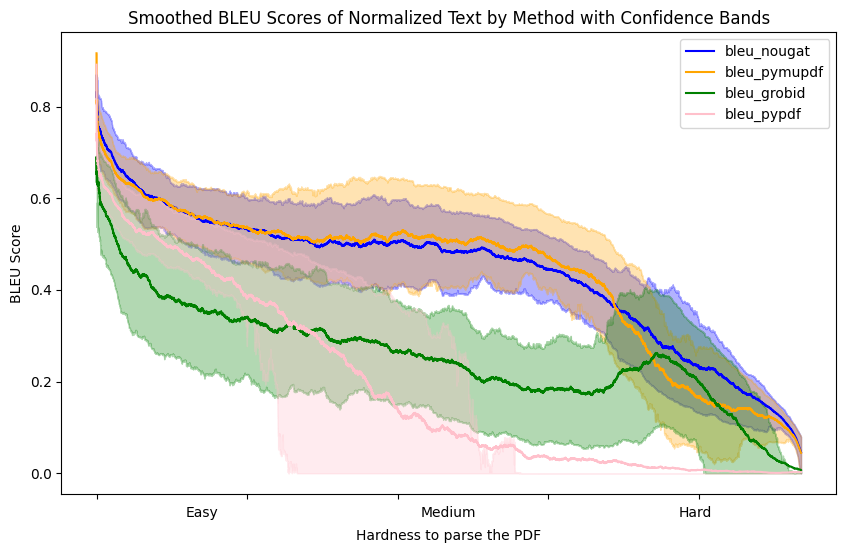

In [18]:
plot_smoothed_bleu_scores(df, 0.2, True)

In [28]:
parser_columns = {
            'nougat': 'bleu_nougat_norm',
            'pymupdf': 'bleu_pymupdf_norm',
            'grobid': 'bleu_grobid_norm',
            'marker': 'bleu_marker_norm',
            'pypdf': 'bleu_pypdf_norm'
}

df['bleu_norm_mean'] = df[parser_columns.values()].mean(axis=1)

df_sorted = df.sort_values(by='bleu_norm_mean', ascending=False).reset_index(drop=True)

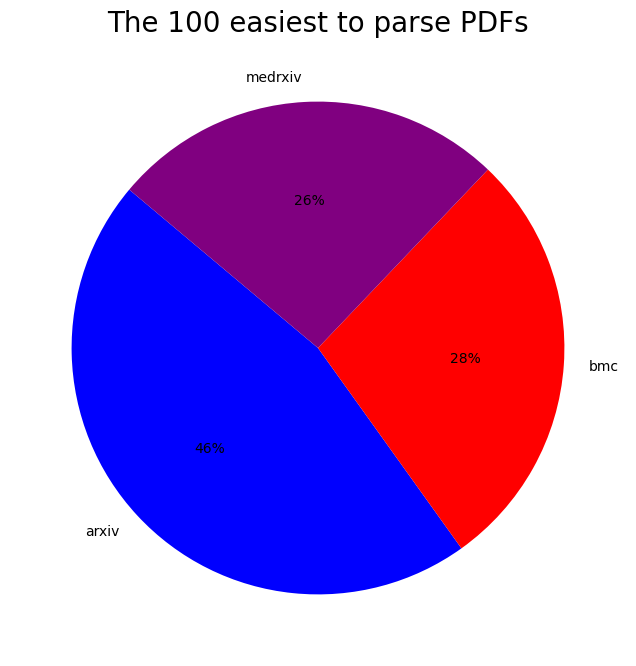

In [32]:
# Extract the first element from the 'path' column after splitting by '/'
first_elements = df_sorted[:100]['path'].str.split('/').str[0]
value_counts = first_elements.value_counts()

color_map = {
    'bmc': '#FF0000',
    'arxiv': '#0000FF',
    'biorxiv': '#00FF00',
    'mdpi' : '#FFA500',
    'medrxiv': '#800080',
    'nature': '#00FFFF',
}

colors = [color_map.get(label, 'gray') for label in value_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.f%%', startangle=140)

# Add title
plt.title('The 100 easiest to parse PDFs', fontsize=20)

# Show the plot
plt.show()

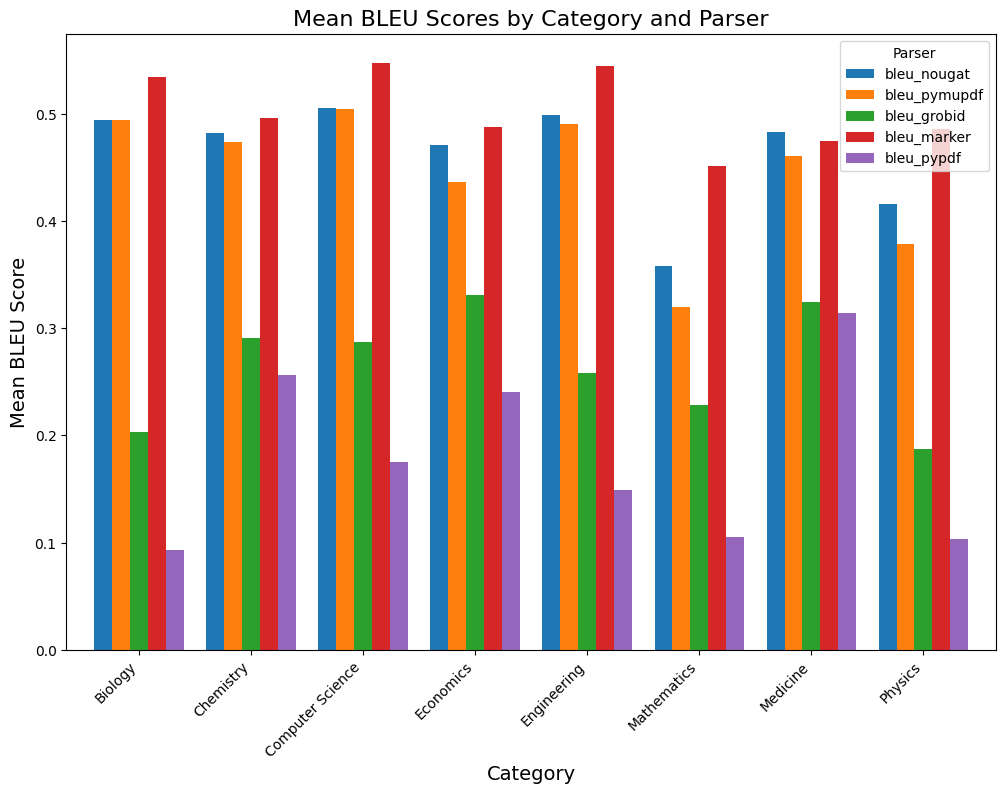

In [35]:
# Assuming df is your DataFrame
# Ensure that these columns exist in the DataFrame
parsers = ['bleu_nougat', 'bleu_pymupdf', 'bleu_grobid', 'bleu_marker', 'bleu_pypdf']

# Group by 'category' and calculate the mean of each parser's BLEU score
df_grouped = df.groupby('category')[parsers].mean()

# Plotting the grouped bar chart
ax = df_grouped.plot(kind='bar', figsize=(12, 8), width=0.8)

# Customize the plot
ax.set_title('Mean BLEU Scores by Category and Parser', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Mean BLEU Score', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title='Parser')

# Show the plot
plt.show()

In [34]:
df.columns

Index(['Unnamed: 0', 'path', 'prim_cat', 'title', 'pdf_url', 'html_url',
       'summary', 'comment', 'id', 'date_published', 'date_updated', 'doi',
       'categories', 'journal_ref', 'pdf_path', 'category', 'subcategory',
       'html_norm', 'nougat_norm', 'pymupdf_norm', 'grobid_norm', 'pypdf_norm',
       'marker_norm', 'bleu_nougat', 'rouge_nougat', 'car_nougat',
       'bleu_nougat_norm', 'rouge_nougat_norm', 'car_nougat_norm',
       'bleu_pymupdf', 'rouge_pymupdf', 'car_pymupdf', 'bleu_pymupdf_norm',
       'rouge_pymupdf_norm', 'car_pymupdf_norm', 'bleu_grobid', 'rouge_grobid',
       'car_grobid', 'bleu_grobid_norm', 'rouge_grobid_norm',
       'car_grobid_norm', 'bleu_pypdf', 'rouge_pypdf', 'car_pypdf',
       'bleu_pypdf_norm', 'rouge_pypdf_norm', 'car_pypdf_norm', 'bleu_marker',
       'rouge_marker', 'car_marker', 'bleu_marker_norm', 'rouge_marker_norm',
       'car_marker_norm', 'bleu_norm_mean'],
      dtype='object')

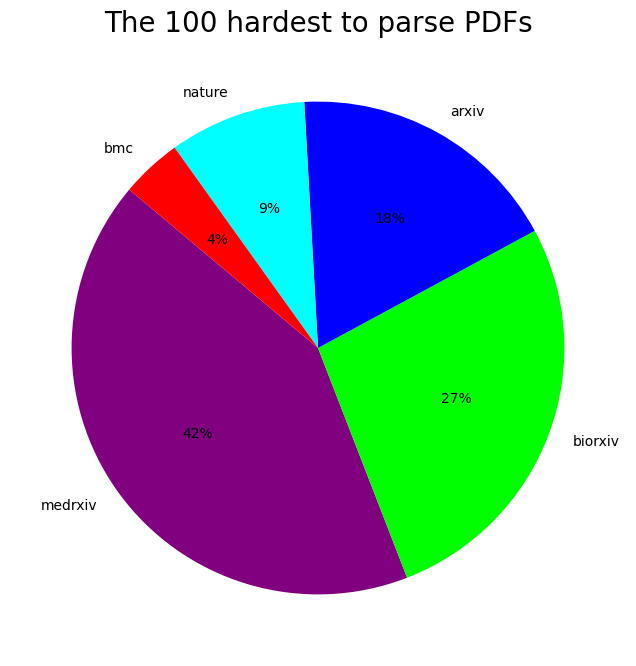

In [31]:
# Extract the first element from the 'path' column after splitting by '/'
first_elements = df_sorted[-100:]['path'].str.split('/').str[0]
value_counts = first_elements.value_counts()

color_map = {
    'bmc': '#FF0000',
    'arxiv': '#0000FF',
    'biorxiv': '#00FF00',
    'mdpi' : '#FFA500',
    'medrxiv': '#800080',
    'nature': '#00FFFF',
}

colors = [color_map.get(label, 'gray') for label in value_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.f%%', startangle=140)

# Add title
plt.title('The 100 hardest to parse PDFs', fontsize=20)

# Show the plot
plt.show()

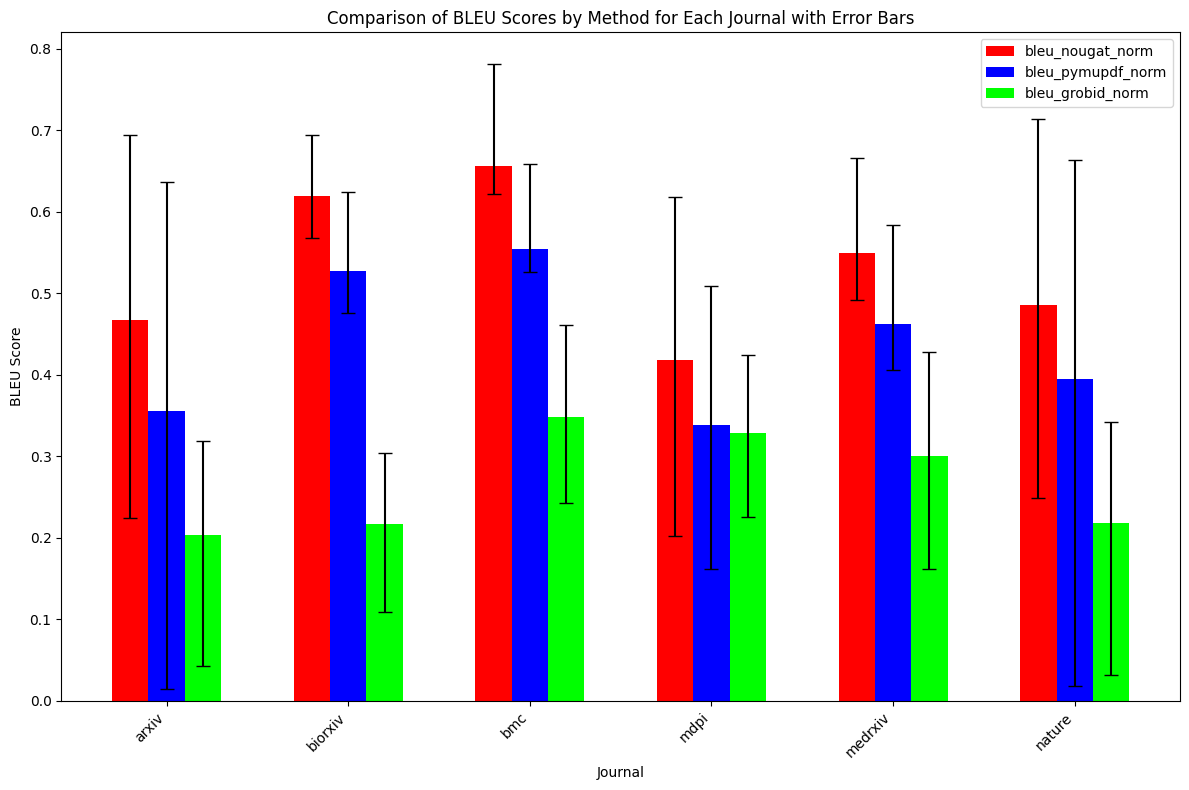

In [41]:
def plot_grouped_bar_chart_with_error_bars(df, quantile=0.25, normalized_flag:bool=False):
    if normalized_flag:
        bleu_nougat_column = 'bleu_nougat_norm'
        bleu_pymupdf_column = 'bleu_pymupdf_norm'
        bleu_grobid_column = 'bleu_grobid_norm'
    else:
        bleu_nougat_column = 'bleu_nougat'
        bleu_pymupdf_column = 'bleu_pymupdf'
        bleu_grobid_column = 'bleu_grobid'
        
    df_new = df.copy()
    df_new['journal'] = df['path'].str.split('/').str[0]
    df_new = df_new[['journal', bleu_nougat_column, bleu_pymupdf_column, bleu_grobid_column]]

    # Step 1: Group the data by 'journal' and calculate the mean and quantiles for each group
    df_grouped = df_new.groupby('journal', as_index=True)[[bleu_nougat_column, bleu_pymupdf_column, bleu_grobid_column]].mean()
    df_lower = df_new.groupby('journal', as_index=True)[[bleu_nougat_column, bleu_pymupdf_column, bleu_grobid_column]].quantile(quantile)
    df_upper = df_new.groupby('journal', as_index=True)[[bleu_nougat_column, bleu_pymupdf_column, bleu_grobid_column]].quantile(1 - quantile)
    
    # Calculate error bars
    error_bars = {
        bleu_nougat_column: [df_grouped[bleu_nougat_column] - df_lower[bleu_nougat_column], df_upper[bleu_nougat_column] - df_grouped[bleu_nougat_column]],
        bleu_pymupdf_column: [df_grouped[bleu_pymupdf_column] - df_lower[bleu_pymupdf_column], df_upper[bleu_pymupdf_column] - df_grouped[bleu_pymupdf_column]],
        bleu_grobid_column: [df_grouped[bleu_grobid_column] - df_lower[bleu_grobid_column], df_upper[bleu_grobid_column] - df_grouped[bleu_grobid_column]],
    }

    # Step 2: Plot the grouped bar chart with error bars
    fig, ax = plt.subplots(figsize=(12, 8))

    # Set the positions and width for the bars
    x = np.arange(df_grouped.shape[0])  # Use the shape directly for speed
    width = 0.2  # the width of the bars

    # Plot each set of bars with error bars
    ax.bar(x - width, df_grouped[bleu_nougat_column], width, label=bleu_nougat_column, color='#FF0000', 
           yerr=error_bars[bleu_nougat_column], capsize=5)  # Red
    ax.bar(x, df_grouped[bleu_pymupdf_column], width, label=bleu_pymupdf_column, color='#0000FF', 
           yerr=error_bars[bleu_pymupdf_column], capsize=5)  # Blue
    ax.bar(x + width, df_grouped[bleu_grobid_column], width, label=bleu_grobid_column, color='#00FF00', 
           yerr=error_bars[bleu_grobid_column], capsize=5)  # Green

    # Adding labels, title, and custom x-axis tick labels
    ax.set_xlabel('Journal')
    ax.set_ylabel('BLEU Score')
    ax.set_title('Comparison of BLEU Scores by Method for Each Journal with Error Bars')
    ax.set_xticks(x)
    ax.set_xticklabels(df_grouped.index, rotation=45, ha='right')
    ax.legend()

    # Optimize layout for faster rendering
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage with a quantile parameter controlling the error bars
plot_grouped_bar_chart_with_error_bars(df, quantile=0.25, normalized_flag=True) # 0.25 <-> IQR

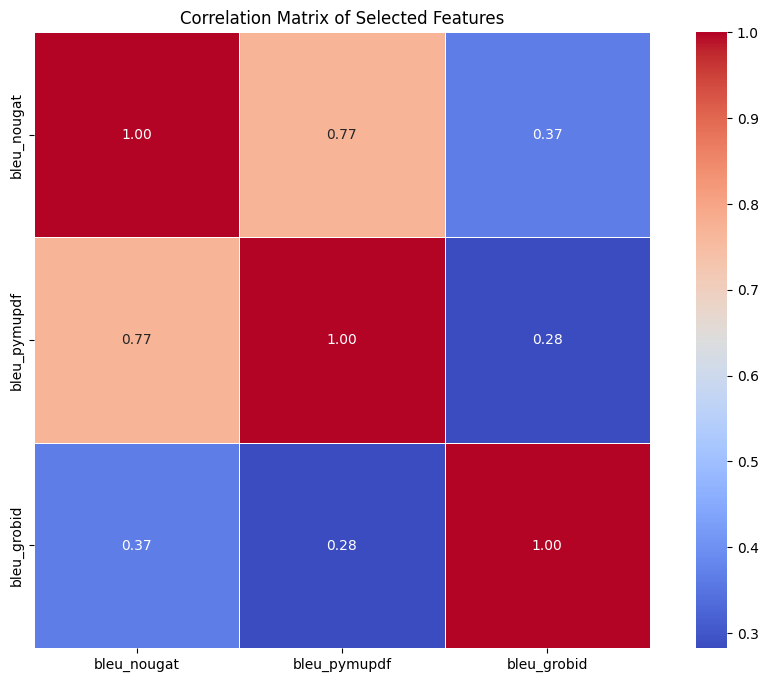

In [53]:
columns_of_interest = [
    'bleu_nougat', 'bleu_pymupdf', 'bleu_grobid'
]

df_selected = df[columns_of_interest]

# Step 2: Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Step 3: Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Selected Features')

# Show the plot
plt.show()

In [72]:
df_inac = df[df['bleu_norm_mean'] < 0.05]
#df_inac = df_inac[['path', 'grobid_norm', 'nougat_norm', 'pymupdf_norm', 'html_norm', 'bleu_norm_mean']]

In [78]:
df_inac.iloc[0]

Unnamed: 0                                                         207
path                                         arxiv/pdf/1009.1049v1.pdf
grobid_norm          the evolution of organismal populations is not...
nougat_norm          abstract the evolution of organismal populatio...
pymupdf_norm         lcs evolvable frontiers 1 lagrangian coherent ...
html_norm            1 introduction the composition of planetesimal...
bleu_nougat                                                   0.025803
bleu_nougat_norm                                              0.016254
bleu_pymupdf                                                  0.024811
bleu_pymupdf_norm                                             0.017343
bleu_grobid                                                    0.00276
bleu_grobid_norm                                              0.002469
bleu_norm_mean                                                0.012022
journal                                                          arxiv
Name: 

In [73]:
df_inac.iloc[0]['html_norm'][:5000] #['nougat_norm']

'1 introduction the composition of planetesimals comets and eventually planets is determined in large part by the composition of their building blocks icecoated dust grains ices are the dominant carriers of volatiles in planetforming regions pontoppidan et al 2014 walsh et al 2015 and set for a large part the spatial distribution of volatiles in the disk mcclure 2019 banzatti et al 2020 sturm et al 2022 banzatti et al 2023 ices not only play a crucial role in the disk chemistry but also in planet formation processes eg öberg bergin 2016 drżkowska et al 2016 unlike the gas present in the protoplanetary disk ices are directly incorporated into the cores of planets comets and icy moons öberg et al 2023b mapping ices in disks at different stages of their evolution is therefore important to understand the initial building blocks available for planet formation with the advent of the james webb space telescope jwst we are in the unique position to target the ice absorption bands in the midinf

In [74]:
df_inac.iloc[0]['grobid_norm'][:5000]

'the evolution of organismal populations is not typically thought of in terms of classical mechanics however many of the conceptual models used to approximate evolutionary trajectories have implicit parallels to dynamic physical systems the parallels between currentlyused evolutionary models and a type of model related to lagrangian coherent structures lcs will be explored the limits of evolvability in a population can be treated in a way analogous to fronts waves and other aggregate formations observed in fluid dynamics various measures and architectural features will be introduced relevant scenarios include socalled evolvable boundaries and related scenarios involving evolutionary neutrality such as migrations demographic bottlenecks and island biogeography the lcslike model introduced here could eventually be applied to a wide range of problems that normally utilize forms of evolutionary modelingintroductionevolutionary processes and their major features have commonalities with phys

In [75]:
df_inac.iloc[0]['nougat_norm'][:5000]

'abstract the evolution of organismal populations is not typically thought of in terms of classical mechanics however many of the conceptual models used to approximate evolutionary trajectories have implicit parallels to dynamic physical systems the parallels between currentlyused evolutionary models and a type of model related to lagrangian coherent structures lcs will be explored the limits of evolvability in a population can be treated in a way analogous to fronts waves and other aggregate formations observed in fluid dynamics various measures and architectural features will be introduced relevant scenarios include socalled evolvable boundaries and related scenarios involving evolutionary neutrality such as migrations demographic bottlenecks and island biogeography the lcslike model introduced here could eventually be applied to a wide range of problems that normally utilize forms of evolutionary modeling lagrangian coherent structures lcs may describe evolvable frontiers in natural

In [77]:
df_inac.iloc[0]['pymupdf_norm'][:5000]

'lcs evolvable frontiers 1 lagrangian coherent structures lcs may describe evolvable frontiers in natural populations bradly alicea department of animal science michigan state university bradlyaliceaieeeorg keywords lagrangian coherent structures evolutionary systems artificial life theoretical biology abstract the evolution of organismal populations is not typically thought of in terms of classical mechanics however many of the conceptual models used to approximate evolutionary trajectories have implicit parallels to dynamic physical systems the parallels between currently used evolutionary models and a type of model related to lagrangian coherent structures lcs will be explored the limits of evolvability in a population can be treated in a way analogous to fronts waves and other aggregate formations observed in fluid dynamics various measures and architectural features will be introduced relevant scenarios include socalled evolvable boundaries and related scenarios involving evolutio

In [76]:
df_inac.iloc[0]

Unnamed: 0                                                         207
path                                         arxiv/pdf/1009.1049v1.pdf
grobid_norm          the evolution of organismal populations is not...
nougat_norm          abstract the evolution of organismal populatio...
pymupdf_norm         lcs evolvable frontiers 1 lagrangian coherent ...
html_norm            1 introduction the composition of planetesimal...
bleu_nougat                                                   0.025803
bleu_nougat_norm                                              0.016254
bleu_pymupdf                                                  0.024811
bleu_pymupdf_norm                                             0.017343
bleu_grobid                                                    0.00276
bleu_grobid_norm                                              0.002469
bleu_norm_mean                                                0.012022
journal                                                          arxiv
Name: 